>__ACK:__ *** This whole code is developed by __Shama Satter__ ***

# __Create environment for running AI program__

In [ ]:
countNoiseValue = 350

> __Install libraris__ https://pypi.org

In [ ]:
# %pip install pandas
# %pip install heartpy
# %pip install tsfel
# %pip install librosa
# %pip install statsmodels
# %pip install lightgbm
# %pip install catboost
# %pip install xgboost

> __Import libraries and dependencies__

In [22]:
import pandas as pd
import numpy as np
import heartpy as hp
from   matplotlib import pyplot as plt
import tsfel
import scipy 
import sklearn as sk
from   sklearn.ensemble import RandomForestRegressor
import librosa
import csv
import pandas as pd
import os
import xgboost as xgb
import random
import statsmodels.regression
from   warnings import filterwarnings
import lightgbm as ltb
from   sklearn import metrics
import catboost as cab
from   sklearn.model_selection import GridSearchCV
import time
from   datetime import datetime
from   sklearn.metrics import mean_squared_error, accuracy_score
from   sklearn.metrics import r2_score
from   IPython.display import clear_output
from sklearn.model_selection import KFold

# __Data collection & preprocessing__

> Mount Gdrive

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

> Inserting Data

In [66]:
## PPG Data
# define parent directory of PPG files
# PPG_dataDirectory = 'gdrive/My Drive/Colab Notebooks/SCI#02/DataBase/data/'
PPG_dataDirectory = './DataBase/Selected_PPG_wrist/'
# PPG CSV filenames
PPG_data =  [   
            '210823_4.csv',   
            '210830_0.csv',   
            '210927_0.csv',             
            '210927_1.csv',             
            '210927_2.csv',            
            '210928_0.csv',                       
            '210928_1.csv',          
            '210929_0.csv',           
            '210930_0.csv',            
            '210930_1.csv',            
            '210930_2.csv',           
            '210930_3.csv',            
            '210930_4.csv',           
            '210930_5.csv',         
            '211001_0.csv',         
            '211001_1.csv', 
            '211001_2.csv',
            '211018_1.csv',
            '211018_2.csv',
            '211018_3.csv',
            '211018_4.csv',
            '211019_0.csv',
            '211026_0.csv',
            '211026_1.csv',
            '211026_2.csv',
            '211026_3.csv',
            '211115_0.csv',
            '211115_1.csv',         
            ]
# Assigning complete filename of PPG CSV data
PPG_csvData = []
for fileName in PPG_data:
    PPG_csvData.append(PPG_dataDirectory+fileName)


## HbA1c data
HbA1c_data  =   [ 
                8.4,5.4,7.6,5.5,5.4,6.0,5.3,6.3,5.7,4.9,5.6,5.5,5.2,5.2,5.5,5.8,5.7,5.6,5.5,5.7,5.6,7.4,6.2,7.0,6.3,5.3,8.2,6.7
                ]


## SpO2 data
SpO2_data   =   [ 96,97,97,98,97,96,97,97,96,96,97,95,95,98,97,95,97,97,97,97,97,96,97,96,97,98,97,97                
                ]


## Age data
Age_data    =   [ 
                34,25,63,26,25,63,30,27,25,34,
                35
                ]


## Gender data
Gender_data =   [ 
                'M','F','M','M','F','M','F','M','M','M',
                'M','M','F','F','M','M','M','M','M','M','M','M','M','M','M','M','M','M'
                ]


                
## BMI data
BMI_data    =   [ 
                28.71,23.6,28.71,24,23.6,23.3,27.9,25.8,25.82,19.71,22.72,33.96,20.64,22.04,25.26,20.6,20.4,33.3,26.4,22.2,30.1,28.71,19.6,25.8,29.1,32.8,30.4,21.7
                ]


print('*****************PPG_csvData******************')
print(PPG_csvData)
print('Data counted = '+ str(len(PPG_csvData)))
print('******************HbA1c_data******************')
print(HbA1c_data)
print('Data counted = '+ str(len(HbA1c_data)))
print('******************SpO2_data*******************')
print(SpO2_data)
print('Data counted = '+ str(len(SpO2_data)))
print('*******************Age_data*******************')
print(Age_data)
print('Data counted = '+ str(len(Age_data)))
print('*****************Gender_data******************')
print(Gender_data)
print('Data counted = '+ str(len(Gender_data)))


print('******************BMI_data********************')
print(BMI_data)
print('Data counted = '+ str(len(BMI_data)))

*****************PPG_csvData******************
['./DataBase/Selected_PPG_wrist/210823_4.csv', './DataBase/Selected_PPG_wrist/210830_0.csv', './DataBase/Selected_PPG_wrist/210927_0.csv', './DataBase/Selected_PPG_wrist/210927_1.csv', './DataBase/Selected_PPG_wrist/210927_2.csv', './DataBase/Selected_PPG_wrist/210928_0.csv', './DataBase/Selected_PPG_wrist/210928_1.csv', './DataBase/Selected_PPG_wrist/210929_0.csv', './DataBase/Selected_PPG_wrist/210930_0.csv', './DataBase/Selected_PPG_wrist/210930_1.csv', './DataBase/Selected_PPG_wrist/210930_2.csv', './DataBase/Selected_PPG_wrist/210930_3.csv', './DataBase/Selected_PPG_wrist/210930_4.csv', './DataBase/Selected_PPG_wrist/210930_5.csv', './DataBase/Selected_PPG_wrist/211001_0.csv', './DataBase/Selected_PPG_wrist/211001_1.csv', './DataBase/Selected_PPG_wrist/211001_2.csv', './DataBase/Selected_PPG_wrist/211018_1.csv', './DataBase/Selected_PPG_wrist/211018_2.csv', './DataBase/Selected_PPG_wrist/211018_3.csv', './DataBase/Selected_PPG_wrist/2

> Making array

In [68]:
PPG_csvArray  = np.asarray(PPG_csvData)
HbA1c_Array   = np.asarray(HbA1c_data)
SpO2_Array    = np.asarray(SpO2_data)
Age_Array     = np.asarray(Age_data)
Gender_Array  = np.asarray(Gender_data)

BMI_Array     = np.asarray(BMI_data)


In [70]:
df=pd.DataFrame(PPG_csvArray)
df1=pd.DataFrame(HbA1c_Array)
df2=pd.DataFrame(SpO2_Array)
df3=pd.DataFrame(Gender_Array )
df4=pd.DataFrame(BMI_Array )
f=pd.concat([df,df1,df2,df3,df4], axis=1)
f

,0,0,0,0,0
0,./DataBase/Selected_PPG_wrist/210823_4.csv,8.4,96,M,28.71
1,./DataBase/Selected_PPG_wrist/210830_0.csv,5.4,97,F,23.60
2,./DataBase/Selected_PPG_wrist/210927_0.csv,7.6,97,M,28.71
3,./DataBase/Selected_PPG_wrist/210927_1.csv,5.5,98,M,24.00
4,./DataBase/Selected_PPG_wrist/210927_2.csv,5.4,97,F,23.60
5,./DataBase/Selected_PPG_wrist/210928_0.csv,6.0,96,M,23.30
6,./DataBase/Selected_PPG_wrist/210928_1.csv,5.3,97,F,27.90
7,./DataBase/Selected_PPG_wrist/210929_0.csv,6.3,97,M,25.80
8,./DataBase/Selected_PPG_wrist/210930_0.csv,5.7,96,M,25.82
9,./DataBase/Selected_PPG_wrist/210930_1.csv,4.9,96,M,19.71


In [25]:
fnam=PPG_csvArray
fnam

array(['./DataBase/Selected_PPG_wrist/210823_4.csv',
       './DataBase/Selected_PPG_wrist/210830_0.csv',
       './DataBase/Selected_PPG_wrist/210927_0.csv',
       './DataBase/Selected_PPG_wrist/210927_1.csv',
       './DataBase/Selected_PPG_wrist/210927_2.csv',
       './DataBase/Selected_PPG_wrist/210928_0.csv',
       './DataBase/Selected_PPG_wrist/210928_1.csv',
       './DataBase/Selected_PPG_wrist/210929_0.csv',
       './DataBase/Selected_PPG_wrist/210930_0.csv',
       './DataBase/Selected_PPG_wrist/210930_1.csv',
       './DataBase/Selected_PPG_wrist/210930_2.csv',
       './DataBase/Selected_PPG_wrist/210930_3.csv',
       './DataBase/Selected_PPG_wrist/210930_4.csv',
       './DataBase/Selected_PPG_wrist/210930_5.csv',
       './DataBase/Selected_PPG_wrist/211001_0.csv',
       './DataBase/Selected_PPG_wrist/211001_1.csv',
       './DataBase/Selected_PPG_wrist/211001_2.csv',
       './DataBase/Selected_PPG_wrist/211018_1.csv',
       './DataBase/Selected_PPG_wrist/211018_2

In [ ]:
# PPG_csvArray  = PPG_csvArray[22:]
# HbA1c_Array   = HbA1c_Array [22:] 
# SpO2_Array    = SpO2_Array  [22:]
# Age_Array     = Age_Array   [22:]
# Gender_Array  = Gender_Array[22:] 
# FW_Array      = FW_Array    [22:] 
# BMI_Array     = BMI_Array   [22:] 

In [ ]:
# print(len(PPG_csvArray))
# print(PPG_csvArray, HbA1c_Array, SpO2_Array, Age_Array, Gender_Array, FW_Array, BMI_Array)

In [ ]:
# df     = pd.read_csv(PPG_csvArray[0], delimiter=',', header=None)
# df

In [61]:
def visual_PPG(PPG, drawFigure=True):

    for i in range (0,len(PPG)):
        
        # Getting corresponding Combined PPG Data 
        dat    = pd.read_csv(PPG[i], delimiter=',', header=None)
        print('********************************')
        print('Index='+str(i)+' || '+str(PPG[i]))
        print('********************************')
        if (dat.shape[1] == 3):
           bs = dat.iloc[:,2]
           gs = dat.iloc[:,1]
           rs = dat.iloc[:,0]
        else:
           bs = dat.iloc[:,3]
           gs = dat.iloc[:,2]
           rs = dat.iloc[:,1]
    
        # Visualization **Don't mention inside the pseudo code**
        if drawFigure:
           plt.rcParams.update(plt.rcParamsDefault)
           plt.rcParams['font.size'] = '8'
           fig,axs = plt.subplots(3, figsize=(20, 5))
           axs[0].set(title='Visualization of Wrist PPG Signal')
           axs[0].plot(bs, color='blue', label='blue signal')
           axs[0].set(ylabel = ' ')
           axs[0].legend(loc=1)
           axs[0].grid(True)
           axs[1].plot(gs, color='green', label='green signal')
           axs[1].set(ylabel = ' ', xlabel = ' ')
           axs[1].legend(loc=1)
           axs[1].grid(True)
           axs[2].plot(rs, color='red', label='red signal')
           axs[2].set(ylabel = ' ', xlabel = ' ')
           axs[2].legend(loc=1)
           axs[2].grid(True)
           plt.show()
        
    # Return
    return

********************************
Index=0 || ./DataBase/Selected_PPG_wrist/210823_4.csv
********************************


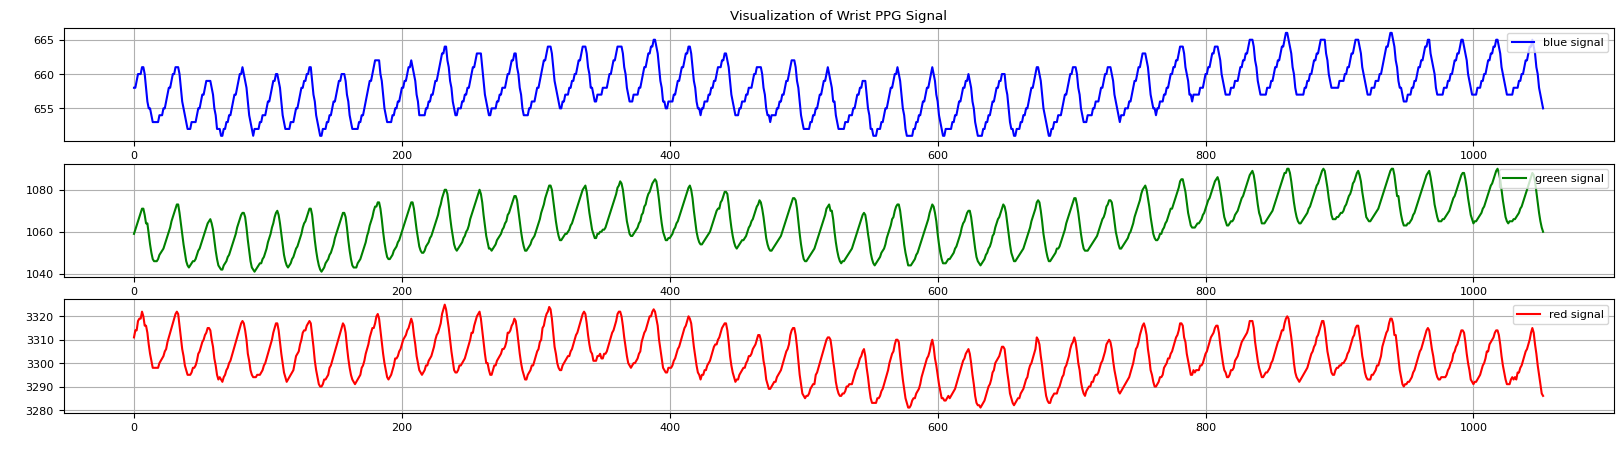

********************************
Index=1 || ./DataBase/Selected_PPG_wrist/210830_0.csv
********************************


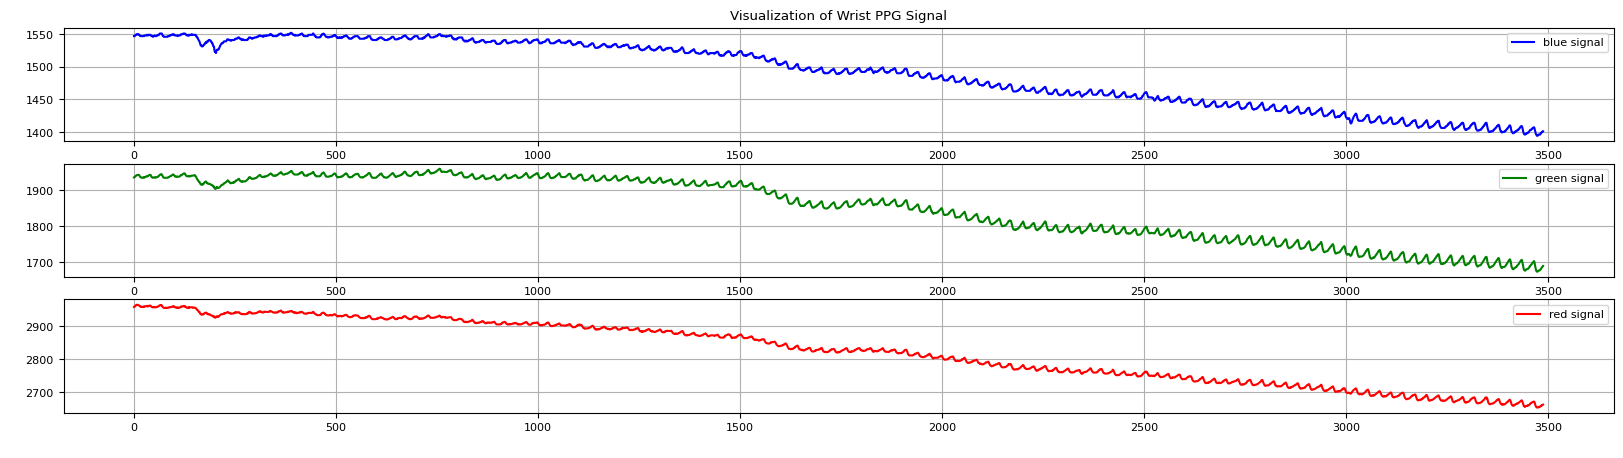

********************************
Index=2 || ./DataBase/Selected_PPG_wrist/210927_0.csv
********************************


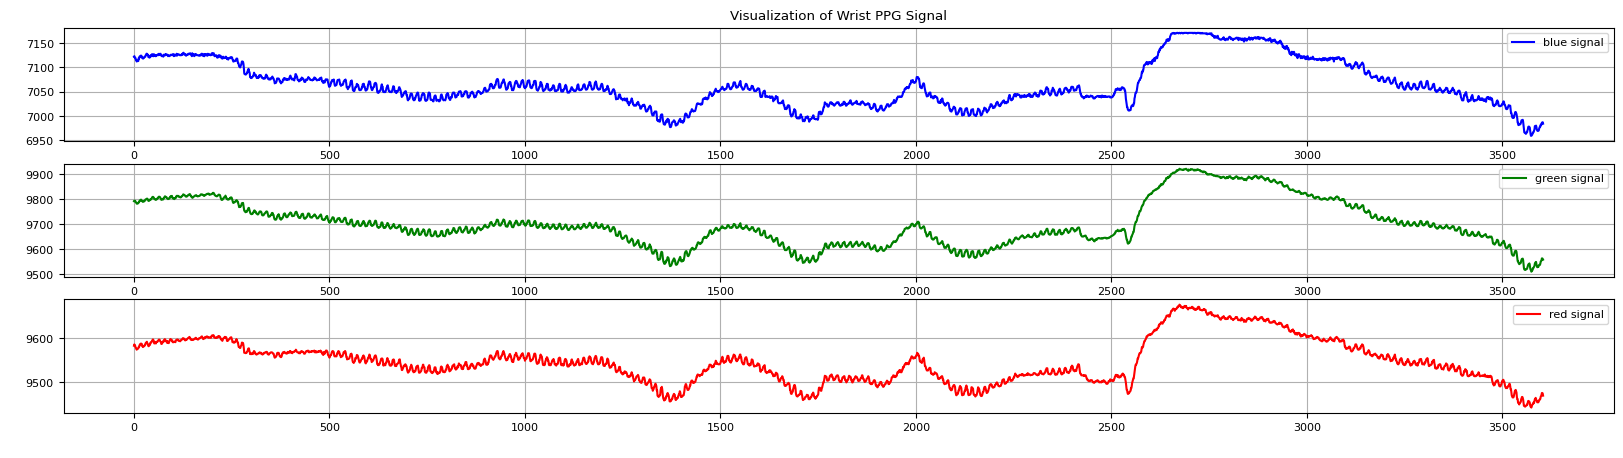

********************************
Index=3 || ./DataBase/Selected_PPG_wrist/210927_1.csv
********************************


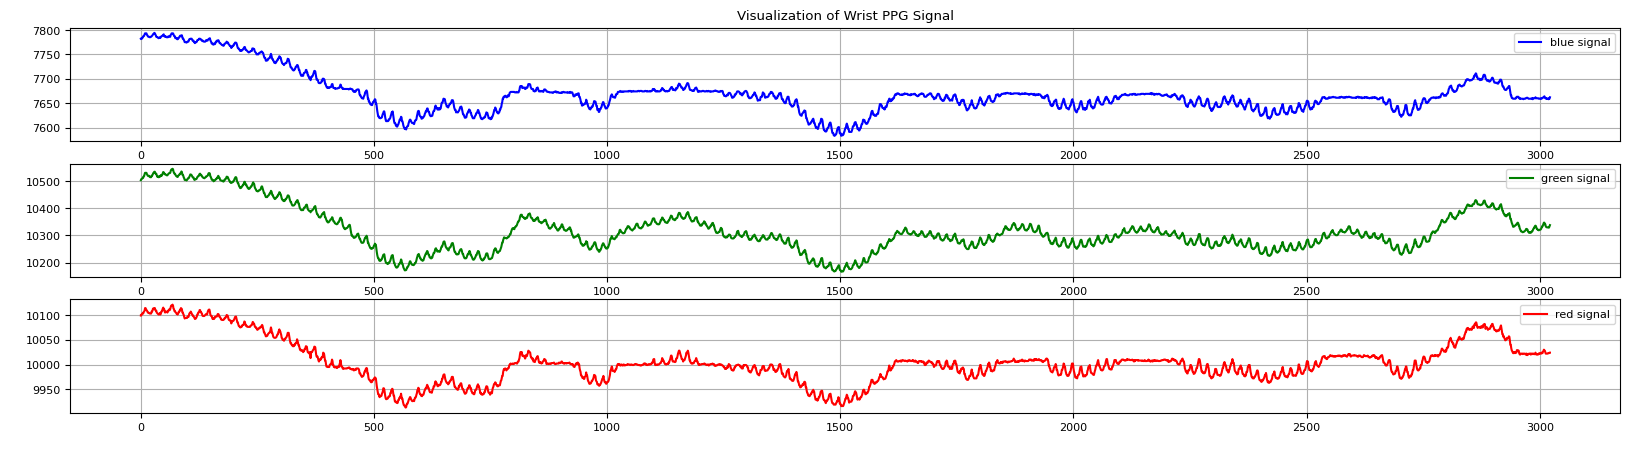

********************************
Index=4 || ./DataBase/Selected_PPG_wrist/210927_2.csv
********************************


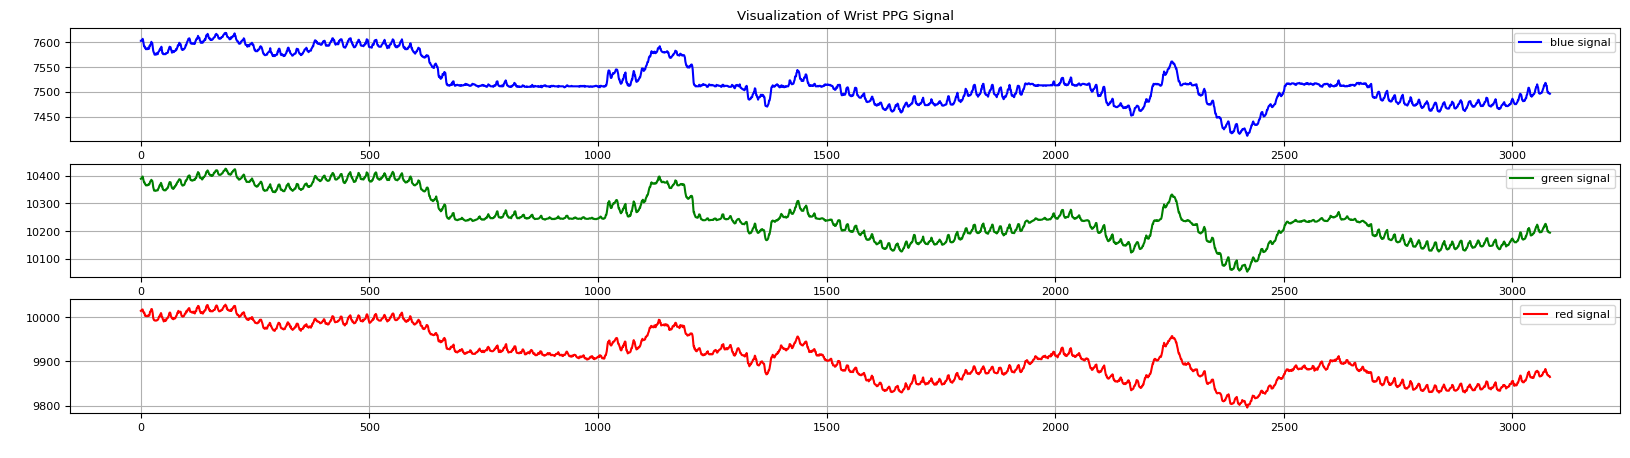

********************************
Index=5 || ./DataBase/Selected_PPG_wrist/210928_0.csv
********************************


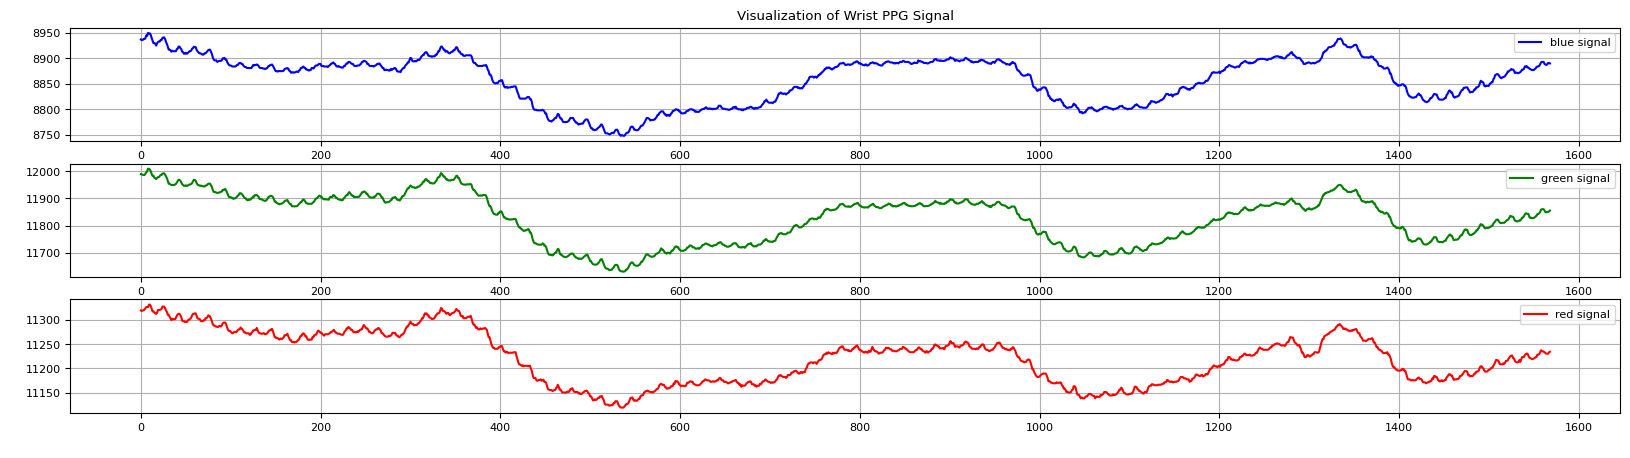

********************************
Index=6 || ./DataBase/Selected_PPG_wrist/210928_1.csv
********************************


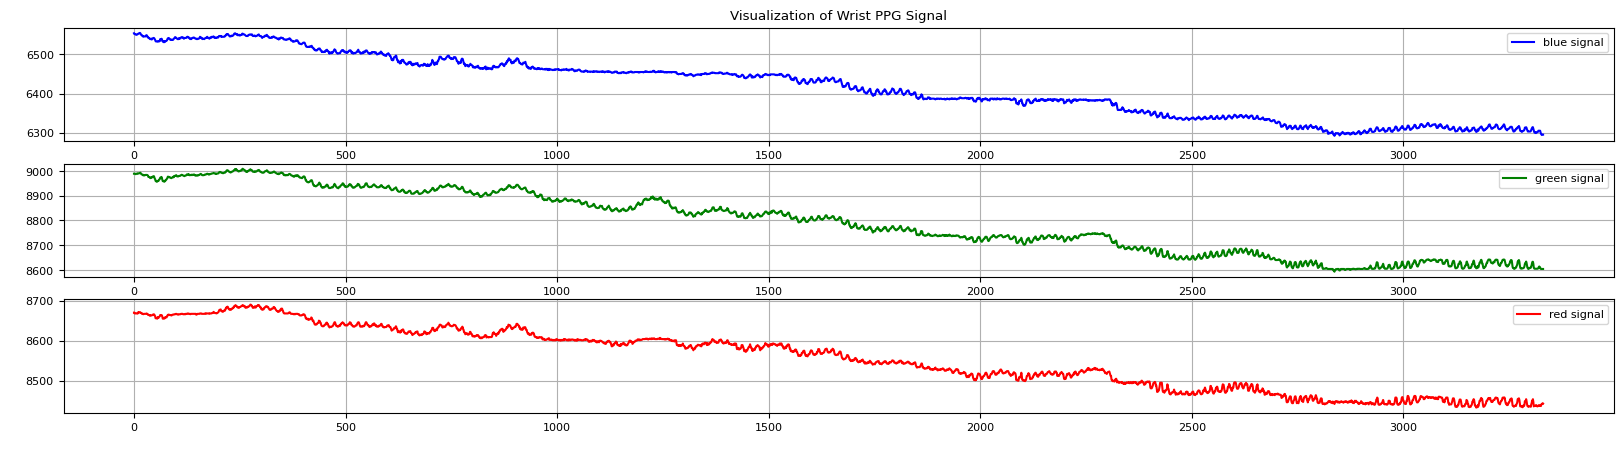

********************************
Index=7 || ./DataBase/Selected_PPG_wrist/210929_0.csv
********************************


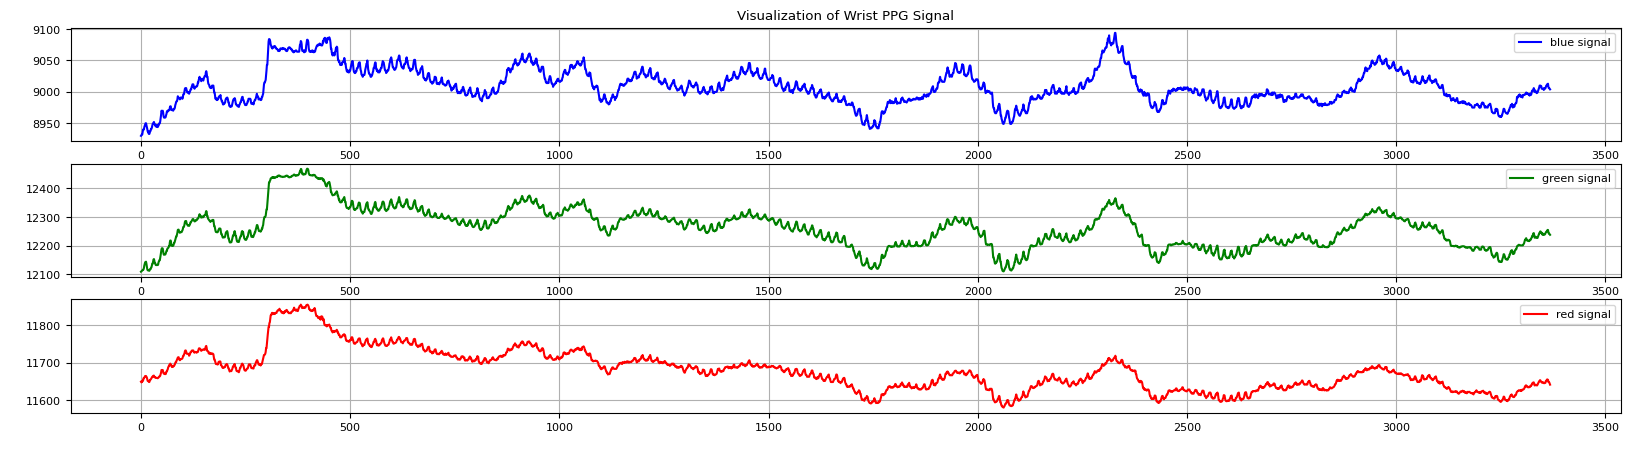

********************************
Index=8 || ./DataBase/Selected_PPG_wrist/210930_0.csv
********************************


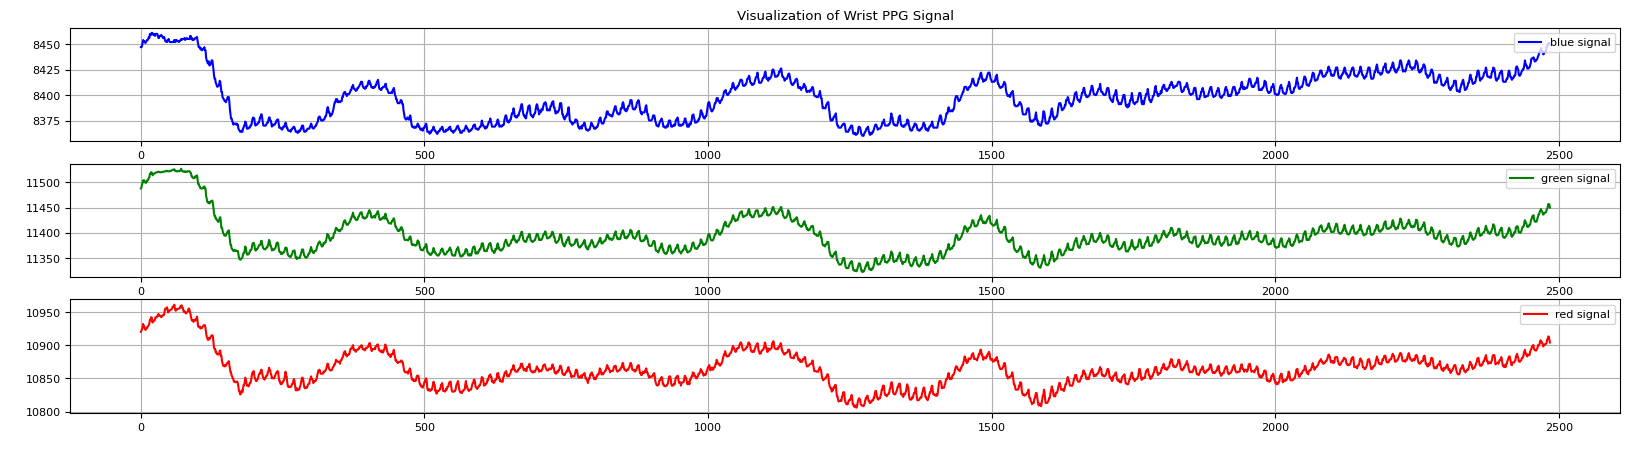

********************************
Index=9 || ./DataBase/Selected_PPG_wrist/210930_1.csv
********************************


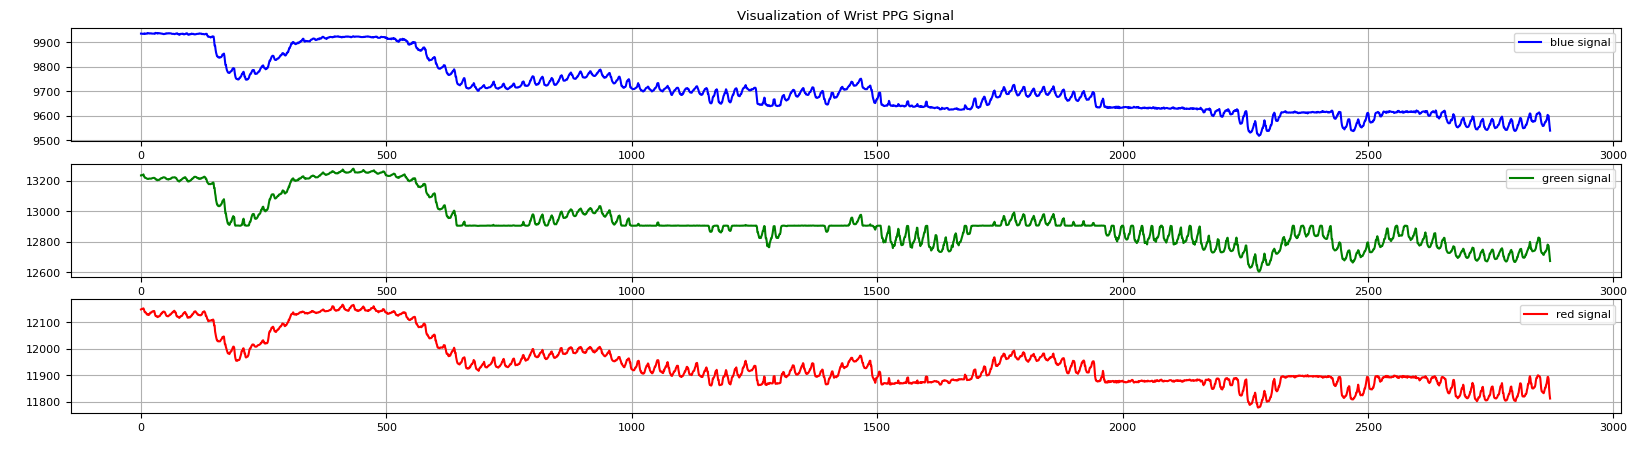

********************************
Index=10 || ./DataBase/Selected_PPG_wrist/210930_2.csv
********************************


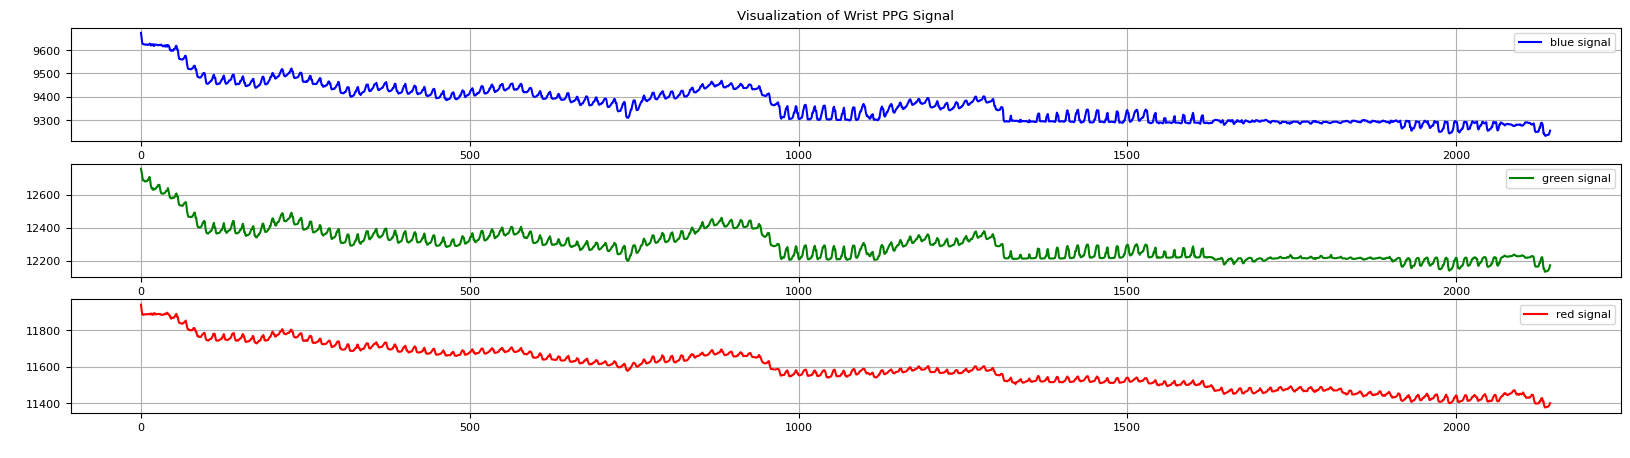

********************************
Index=11 || ./DataBase/Selected_PPG_wrist/210930_3.csv
********************************


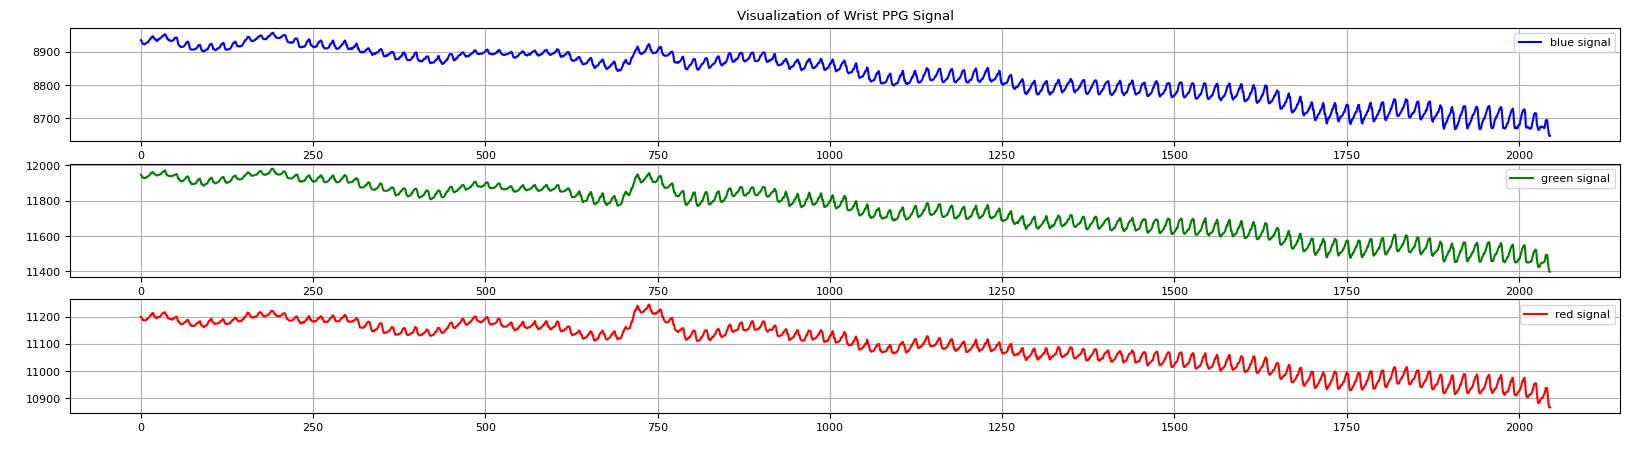

********************************
Index=12 || ./DataBase/Selected_PPG_wrist/210930_4.csv
********************************


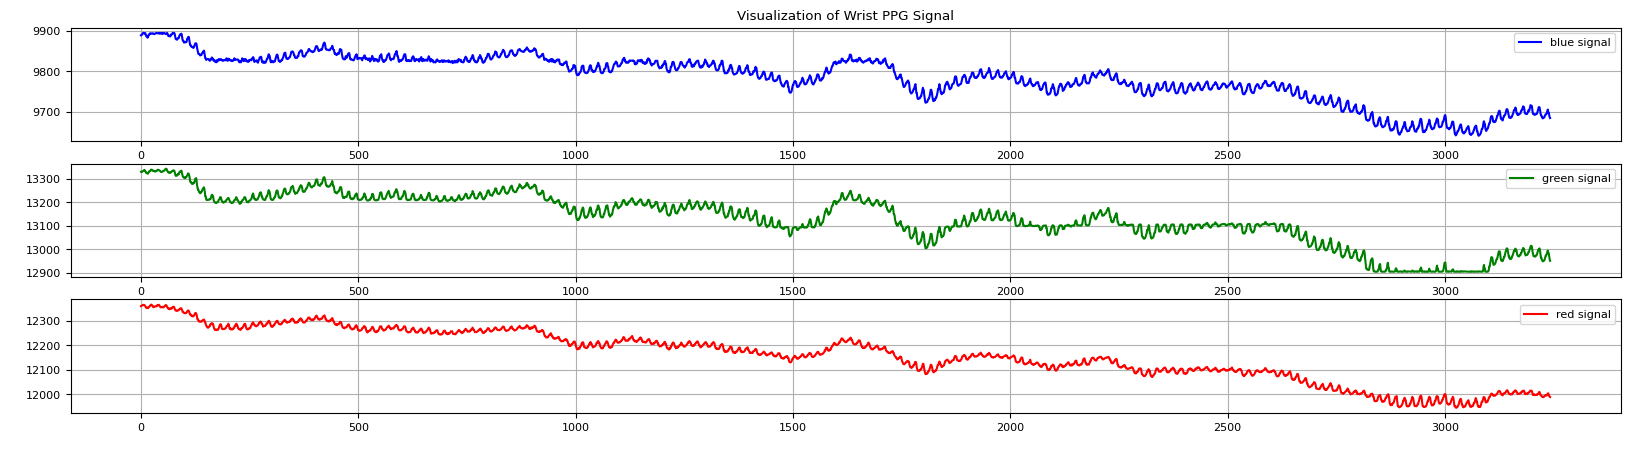

********************************
Index=13 || ./DataBase/Selected_PPG_wrist/210930_5.csv
********************************


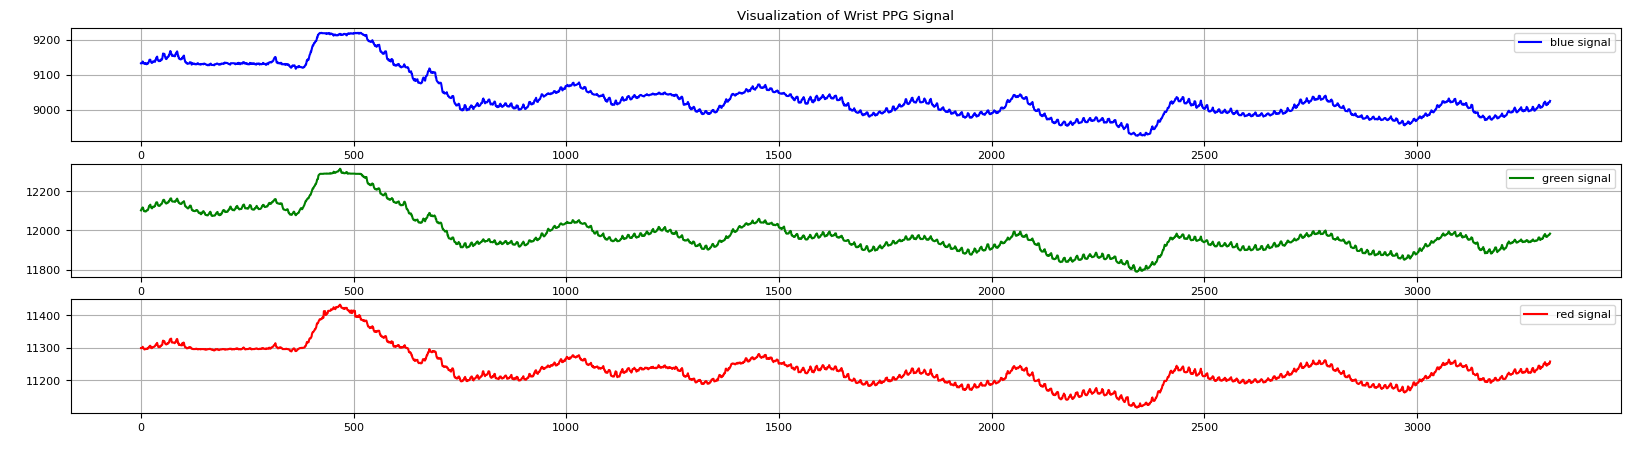

********************************
Index=14 || ./DataBase/Selected_PPG_wrist/211001_0.csv
********************************


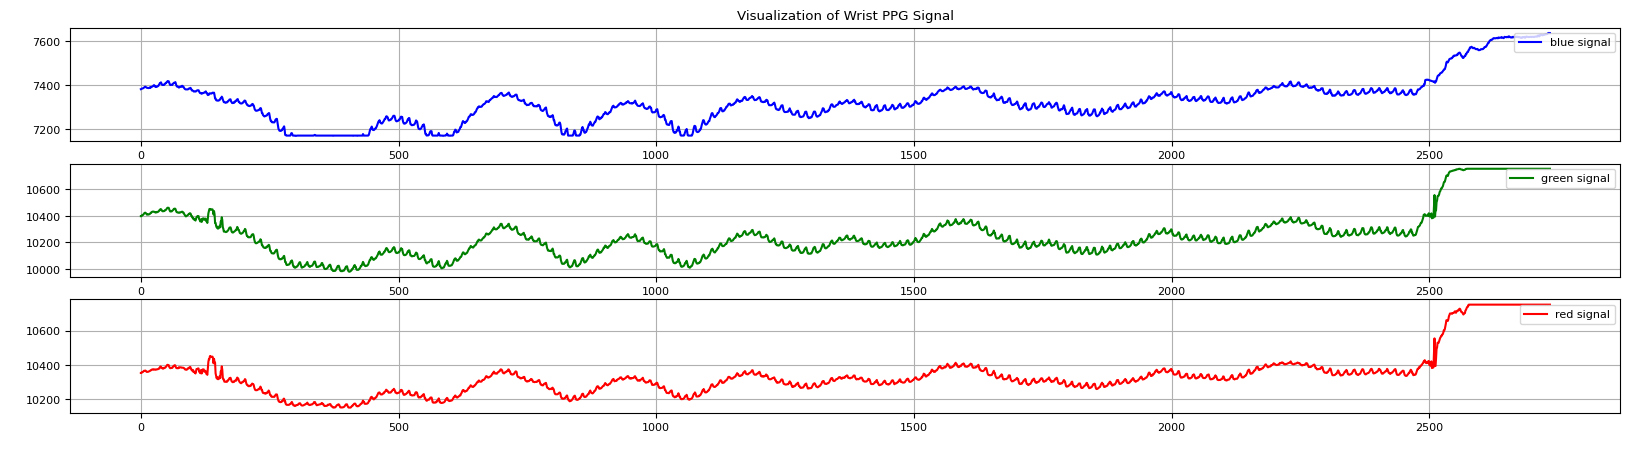

********************************
Index=15 || ./DataBase/Selected_PPG_wrist/211001_1.csv
********************************


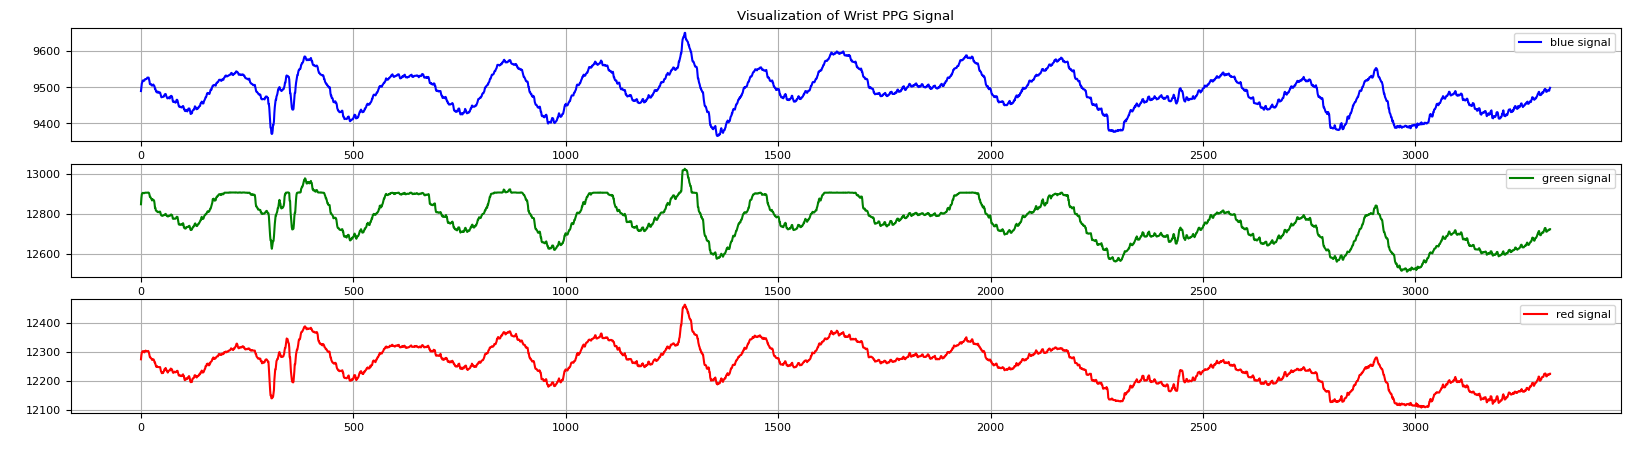

********************************
Index=16 || ./DataBase/Selected_PPG_wrist/211001_2.csv
********************************


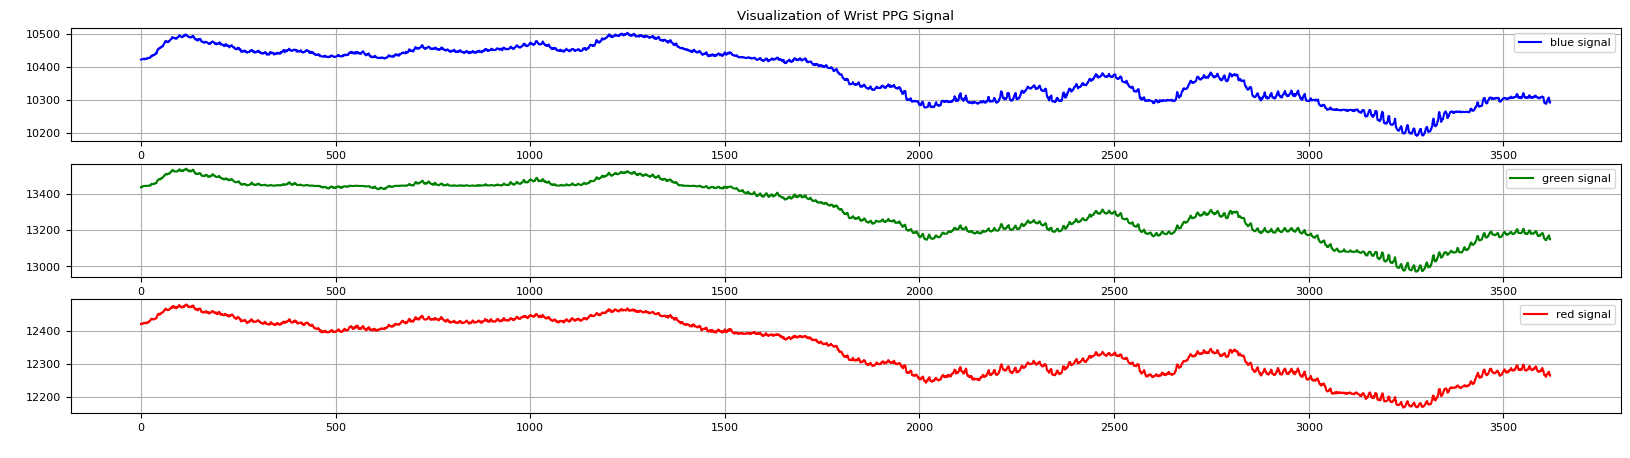

********************************
Index=17 || ./DataBase/Selected_PPG_wrist/211018_1.csv
********************************


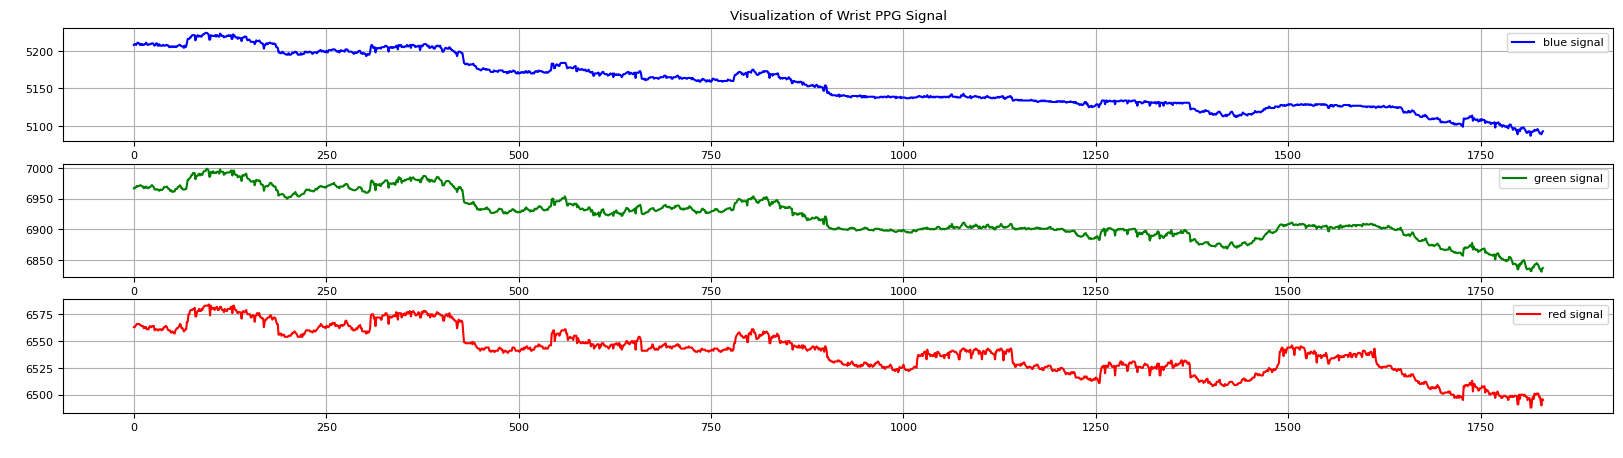

********************************
Index=18 || ./DataBase/Selected_PPG_wrist/211018_2.csv
********************************


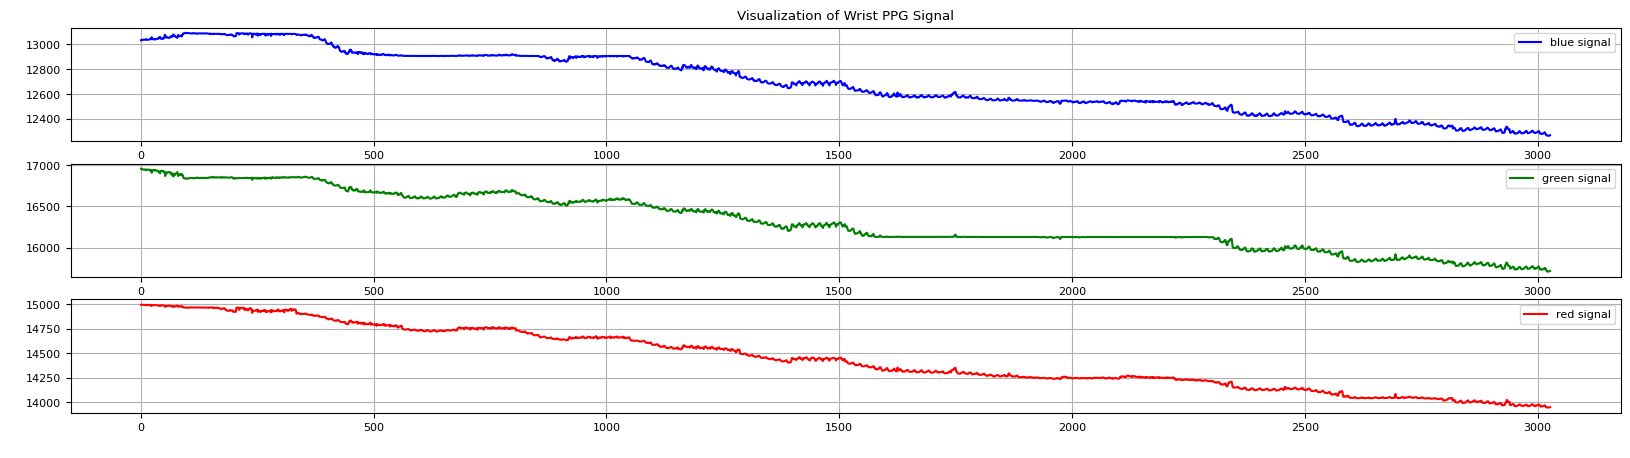

********************************
Index=19 || ./DataBase/Selected_PPG_wrist/211018_3.csv
********************************


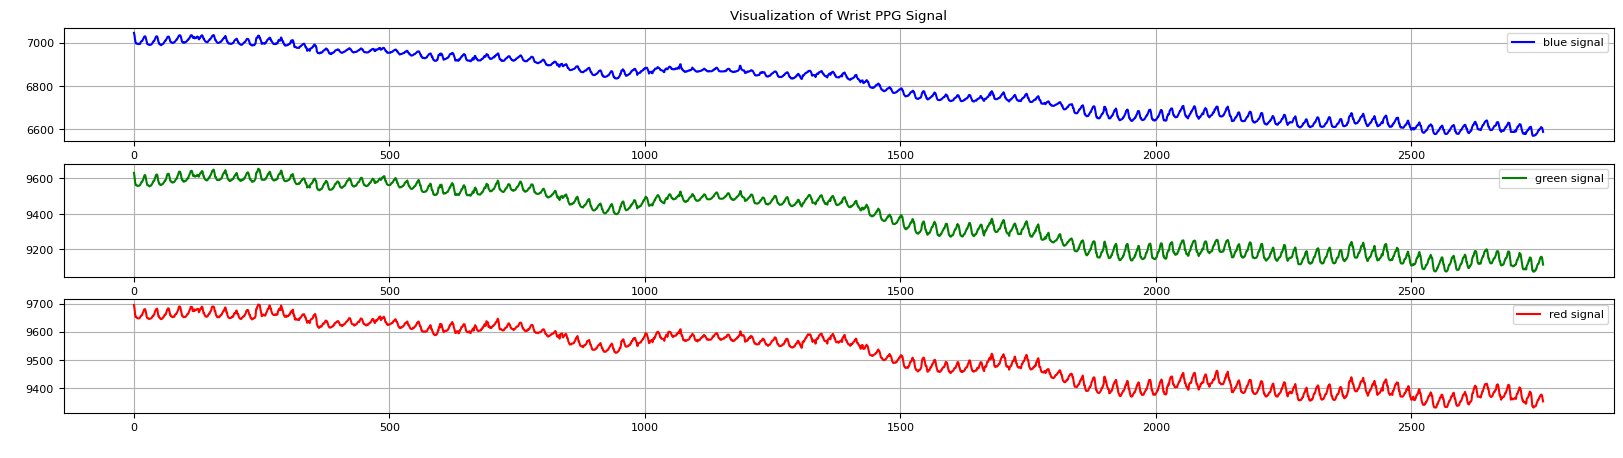

********************************
Index=20 || ./DataBase/Selected_PPG_wrist/211018_4.csv
********************************


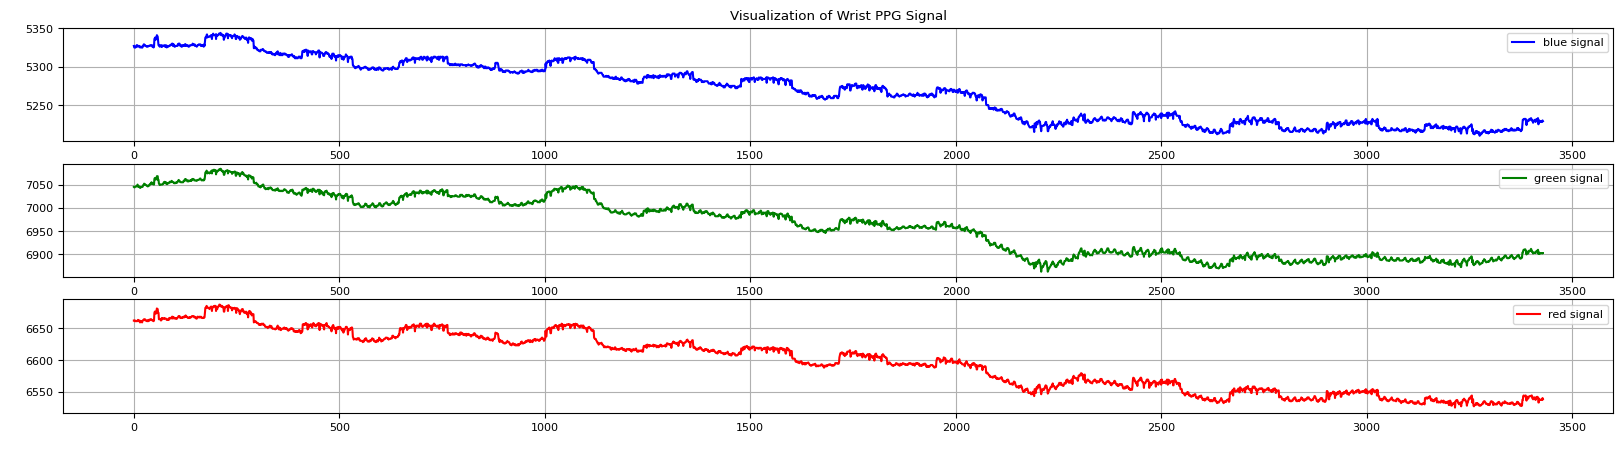

********************************
Index=21 || ./DataBase/Selected_PPG_wrist/211019_0.csv
********************************


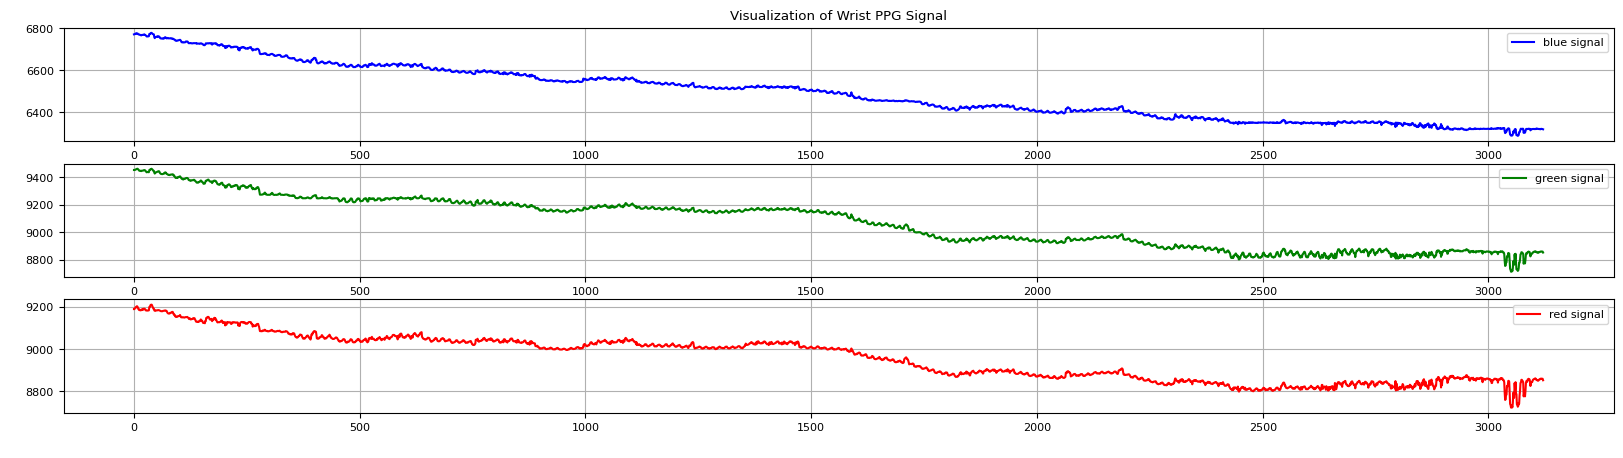

********************************
Index=22 || ./DataBase/Selected_PPG_wrist/211026_0.csv
********************************


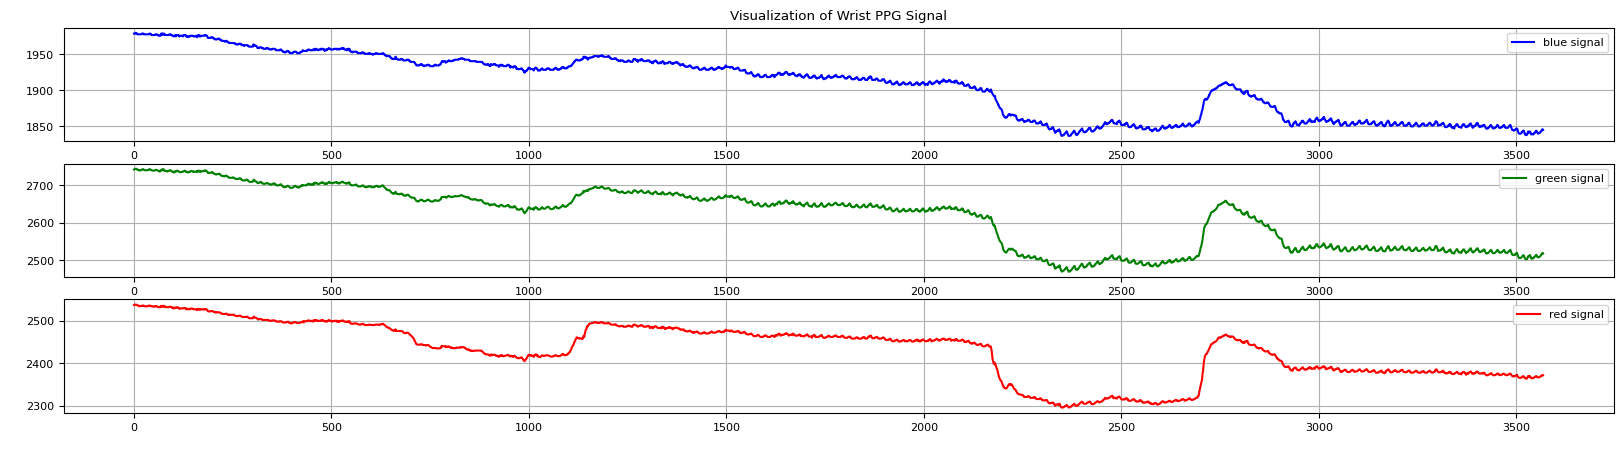

********************************
Index=23 || ./DataBase/Selected_PPG_wrist/211026_1.csv
********************************


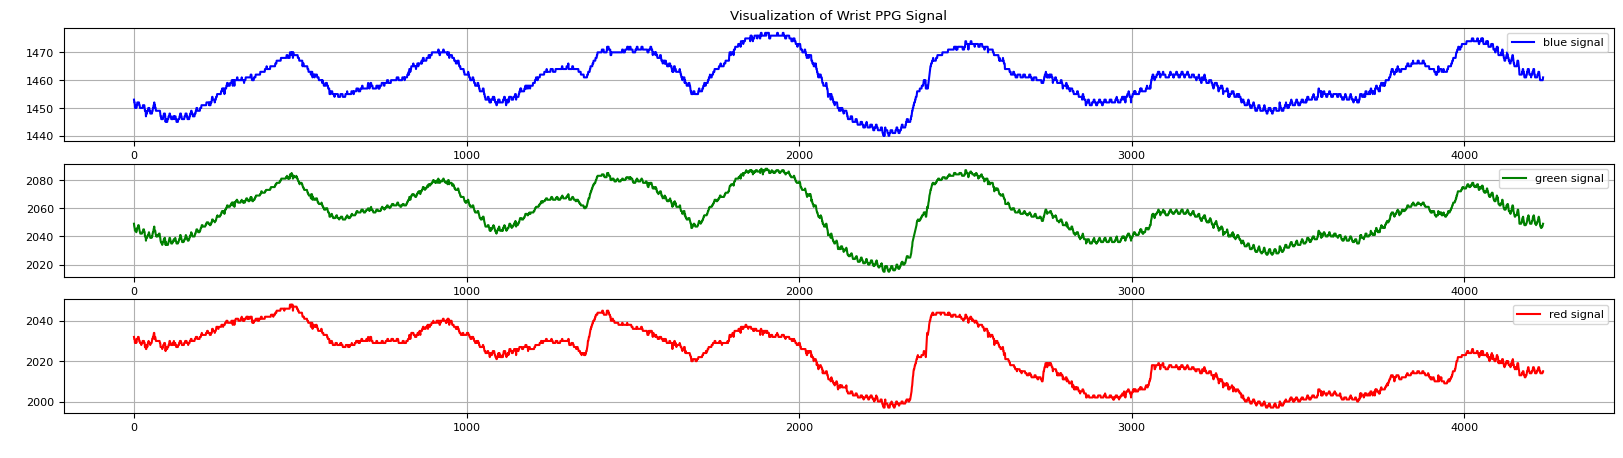

********************************
Index=24 || ./DataBase/Selected_PPG_wrist/211026_2.csv
********************************


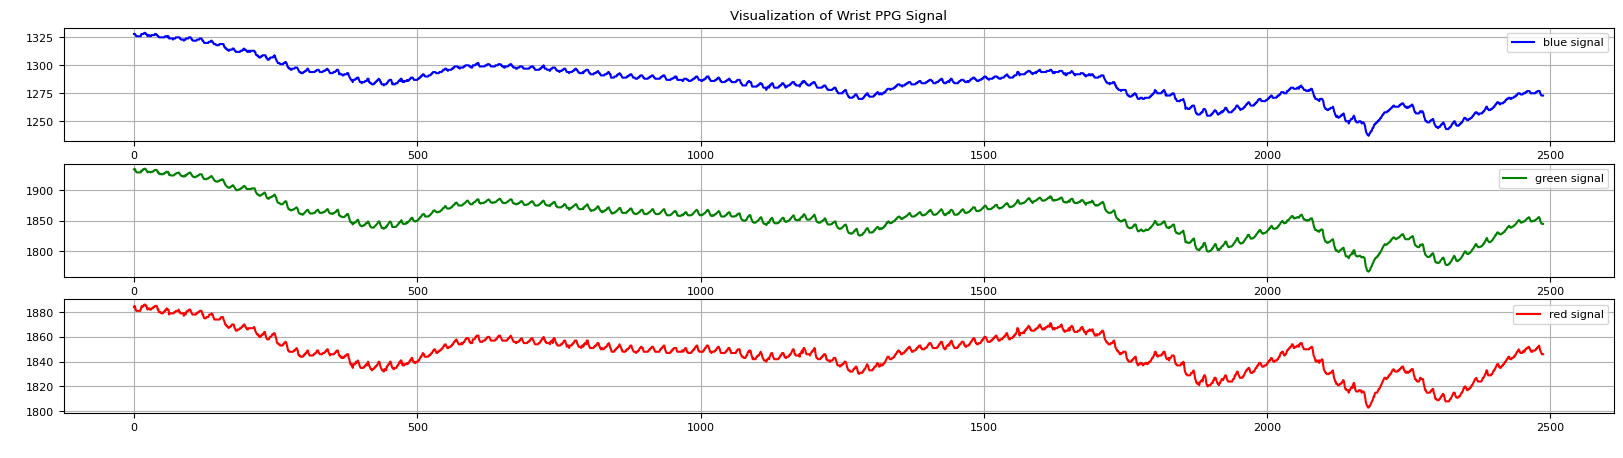

********************************
Index=25 || ./DataBase/Selected_PPG_wrist/211026_3.csv
********************************


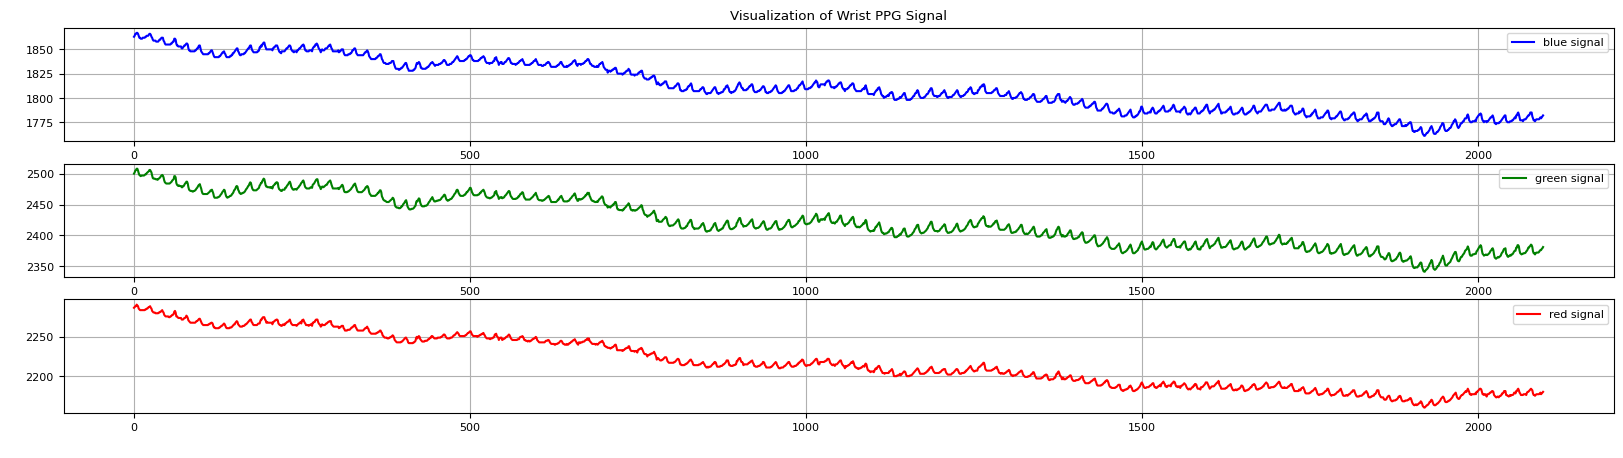

********************************
Index=26 || ./DataBase/Selected_PPG_wrist/211115_0.csv
********************************


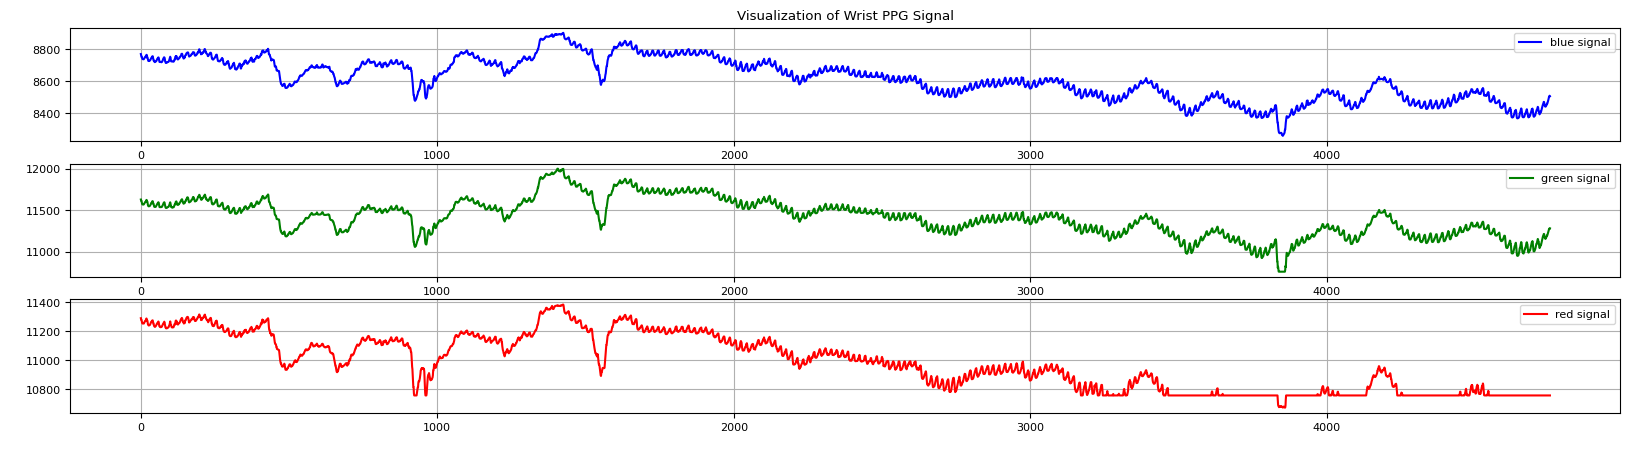

********************************
Index=27 || ./DataBase/Selected_PPG_wrist/211115_1.csv
********************************


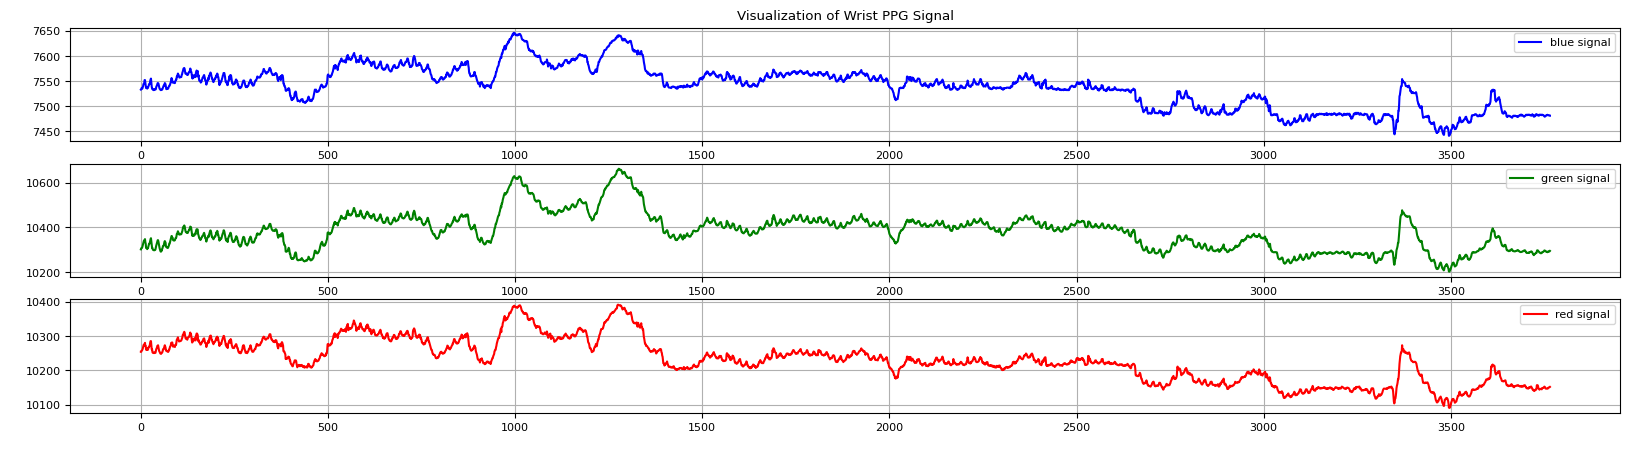

In [62]:
visual_PPG(fnam)

In [ ]:
# wrist update

from scipy import signal
def rprocfunc_w(filename,FS=32,HR = None,base_w=False,indexes=None, offset=None):
    
    #mode = 1 transmission
    #mode = 0 reflection
    
    
    sos = signal.butter(2, 8, fs=FS, output='sos')
    sos1 = signal.butter(2, 0.5,btype='high', fs=36, output='sos')
    
    datin = np.loadtxt(filename,delimiter=',')

    if HR == None:
        flen = 2*FS*60/50
    else:
        flen = 2*FS*60/HR
        flen = 120
    
    
    dat = np.asarray(datin)
    
    b_ac = []
    g_ac = []
    r_ac = []
    
    b_pk = []
    g_pk = []
    r_pk = []
    
    b_dc = []
    g_dc = []
    r_dc = []
    
    b_log = []
    g_log = []
    r_log = []
    
    b_feats = []
    g_feats = []
    r_feats = []
    
    dr1 = []
    dr2 = []
    
    
    
    if (dat.shape[1] == 3):
        bs = dat[:,2]
        gs = dat[:,1]
        rs = dat[:,0]
        
        if type(offset) != type(None):
            bs = bs+offset[0]
            gs = gs+offset[1]
            rs = rs+offset[2]
        
        fil_s_b = signal.sosfilt(sos, bs)[10:]
        fil_s_g = signal.sosfilt(sos, gs)[10:]
        fil_s_r = signal.sosfilt(sos, rs)[10:]
    else:
        bs = dat[:,3]
        gs = dat[:,2]
        rs = dat[:,1]
        
        if type(offset) != type(None):
            bs = bs+offset[0]
            gs = gs+offset[1]
            rs = rs+offset[2]
        
        
        fil_s_b = signal.sosfilt(sos, bs)[10:]
        fil_s_g = signal.sosfilt(sos, gs)[10:]
        fil_s_r = signal.sosfilt(sos, rs)[10:]
    
    if base_w:
        fil_s_b = signal.sosfilt(sos1, fil_s_b)[110:] + np.mean(fil_s_b)
        fil_s_g = signal.sosfilt(sos1, fil_s_g)[110:] + np.mean(fil_s_g)
        fil_s_r = signal.sosfilt(sos1, fil_s_r)[110:] + np.mean(fil_s_r)
    
    if indexes != None:
        mms = masker(indexes,len(fil_s_b))
        fil_s_b = fil_s_b[mms]
        fil_s_g = fil_s_g[mms]
        fil_s_r = fil_s_r[mms]
    
    fr_s = int(0)
    fr_e = int(fr_s+flen)
    fr_den = 3
    
    while fr_e <= len(fil_s_b):
        
        dr1.append(np.mean(np.diff(fil_s_g[fr_s:fr_e])/np.diff(fil_s_r[fr_s:fr_e])))
        dr2.append(np.mean(np.diff(fil_s_b[fr_s:fr_e])/np.diff(fil_s_r[fr_s:fr_e])))
        
        mxv_b = np.max(fil_s_b[fr_s:fr_e])
        mxv_g = np.max(fil_s_g[fr_s:fr_e])
        mxv_r = np.max(fil_s_r[fr_s:fr_e])
        
        mnv_b = np.min(fil_s_b[fr_s:fr_e])
        mnv_g = np.min(fil_s_g[fr_s:fr_e])
        mnv_r = np.min(fil_s_r[fr_s:fr_e])
        
        try:
            bft = extract_ppg45(fil_s_b[fr_s:fr_e],FS)
            gft = extract_ppg45(fil_s_g[fr_s:fr_e],FS)
            rft = extract_ppg45(fil_s_r[fr_s:fr_e],FS)
            
        except:
            fr_s += int(flen/fr_den)
            fr_e += int(flen/fr_den)
            continue
        
        b_feats.append(bft)
        g_feats.append(gft)
        r_feats.append(rft)
        
        b_ac.append(abs(mxv_b-mnv_b))
        g_ac.append(abs(mxv_g-mnv_g))
        r_ac.append(abs(mxv_r-mnv_r))
        
        b_dc.append(min(mxv_b,mnv_b))
        g_dc.append(min(mxv_g,mnv_g))
        r_dc.append(min(mxv_r,mnv_r))
        
        b_pk.append(max(mxv_b,mnv_b))
        g_pk.append(max(mxv_g,mnv_g))
        r_pk.append(max(mxv_r,mnv_r))
        
        b_log.append(np.log10(mxv_b/mnv_b))
        g_log.append(np.log10(mxv_g/mnv_g))
        r_log.append(np.log10(mxv_r/mnv_r))
        
        fr_s += int(flen/fr_den)
        fr_e += int(flen/fr_den)
        
    b_ac = np.asarray(b_ac)
    g_ac = np.asarray(g_ac)
    r_ac = np.asarray(r_ac)
    
    b_pk = np.asarray(b_pk)
    g_pk = np.asarray(g_pk)
    r_pk = np.asarray(r_pk)
    
    b_dc = np.asarray(b_dc)
    g_dc = np.asarray(g_dc)
    r_dc = np.asarray(r_dc)
    
    b_log = np.asarray(b_log)
    g_log = np.asarray(g_log)
    r_log = np.asarray(r_log)
    
    b_feats = np.asarray(b_feats)
    g_feats = np.asarray(g_feats)
    r_feats = np.asarray(r_feats)
    
    r1 = (g_ac/g_dc)/(r_ac/r_dc)
    r2 = (b_ac/b_dc)/(r_ac/r_dc)
    
    r1l = g_log/r_log
    r2l = b_log/r_log
    
#     return [r1,r2,r1l,r2l,s_acs,s_dcs,s_logs]
    return [r1,r2,r1l,r2l,[b_ac,g_ac,r_ac],[b_pk,g_pk,r_pk],[b_dc,g_dc,r_dc],[b_log,g_log,r_log],[b_feats,g_feats,r_feats],[dr1,dr2]]

In [ ]:
dat = []
rdat = []

for fn in fnam:
    print(fn)
#     dat.append(rprocfunc(fn,HR=80))
#     rdat.append(rprocfunc(fn,HR=80,mode=0))
    dat.append(rprocfunc_w(fn,FS=36,HR=80))
    rdat.append(rprocfunc_w(fn,FS=36,HR=80))

In [ ]:
kf = KFold(n_splits=len(fnam), random_state=None, shuffle=False)

rp_b = []
rp_g = []
rp_r = []
rv_b = []
rv_g = []
rv_r = []

for train_index, test_index in kf.split(dat):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    
    # build peak dataset
    pds_b = pfs_b[np.where(np.isin(pfs_b[:,0],train_index))[0],1:]
    pdst_b = pfst_b[np.where(np.isin(pfs_b[:,0],train_index))[0]]
    pds_g = pfs_g[np.where(np.isin(pfs_g[:,0],train_index))[0],1:]
    pdst_g = pfst_g[np.where(np.isin(pfs_g[:,0],train_index))[0]]
    pds_r = pfs_r[np.where(np.isin(pfs_r[:,0],train_index))[0],1:]
    pdst_r = pfst_r[np.where(np.isin(pfs_r[:,0],train_index))[0]]

    pts_b = pfs_b[np.where(np.isin(pfs_b[:,0],test_index))[0],1:]
    ptst_b = pfst_b[np.where(np.isin(pfs_b[:,0],test_index))[0]]
    pts_g = pfs_g[np.where(np.isin(pfs_g[:,0],test_index))[0],1:]
    ptst_g = pfst_g[np.where(np.isin(pfs_g[:,0],test_index))[0]]
    pts_r = pfs_r[np.where(np.isin(pfs_r[:,0],test_index))[0],1:]
    ptst_r = pfst_r[np.where(np.isin(pfs_r[:,0],test_index))[0]]
    
    
    # build valley dataset
    vds_b = vfs_b[np.where(np.isin(vfs_b[:,0],train_index))[0],1:]
    vdst_b = vfst_b[np.where(np.isin(vfs_b[:,0],train_index))[0]]
    vds_g = vfs_g[np.where(np.isin(vfs_g[:,0],train_index))[0],1:]
    vdst_g = vfst_g[np.where(np.isin(vfs_g[:,0],train_index))[0]]
    vds_r = vfs_r[np.where(np.isin(vfs_r[:,0],train_index))[0],1:]
    vdst_r = vfst_r[np.where(np.isin(vfs_r[:,0],train_index))[0]]

    vts_b = vfs_b[np.where(np.isin(vfs_b[:,0],test_index))[0],1:]
    vtst_b = vfst_b[np.where(np.isin(vfs_b[:,0],test_index))[0]]
    vts_g = vfs_g[np.where(np.isin(vfs_g[:,0],test_index))[0],1:]
    vtst_g = vfst_g[np.where(np.isin(vfs_g[:,0],test_index))[0]]
    vts_r = vfs_r[np.where(np.isin(vfs_r[:,0],test_index))[0],1:]
    vtst_r = vfst_r[np.where(np.isin(vfs_r[:,0],test_index))[0]]

    
    # train models
#     print(len(pds_b))
#     print(len(pdst_b))
#     print(len(pts_b))
#     print(len(ptst_b))
#     print(len(vds_b))
#     print(len(vdst_b))
    p_b = xgb.XGBRegressor(n_estimators=1000,objective="reg:squarederror", random_state=42)
    p_g = xgb.XGBRegressor(n_estimators=1000,objective="reg:squarederror", random_state=42)
    p_r = xgb.XGBRegressor(n_estimators=1000,objective="reg:squarederror", random_state=42)
    v_b = xgb.XGBRegressor(n_estimators=1000,objective="reg:squarederror", random_state=42)
    v_g = xgb.XGBRegressor(n_estimators=1000,objective="reg:squarederror", random_state=42)
    v_r = xgb.XGBRegressor(n_estimators=1000,objective="reg:squarederror", random_state=42)
    
    p_b.fit(pds_b,pdst_b)
    p_g.fit(pds_b,pdst_b)
    p_r.fit(pds_b,pdst_b)
    v_b.fit(vds_b,vdst_b)
    v_g.fit(vds_b,vdst_b)
    v_r.fit(vds_b,vdst_b)
    
    
    # evaluate models and add the results
    ppb = p_b.predict(pts_b)
    ppg = p_g.predict(pts_g)
    ppr = p_r.predict(pts_r)
    vpb = v_b.predict(vts_b)
    vpg = v_g.predict(vts_g)
    vpr = v_r.predict(vts_r)
    
    rp_b.append([ppb,ptst_b])
    rp_g.append([ppg,ptst_g])
    rp_r.append([ppr,ptst_r])
    rv_b.append([vpb,vtst_b])
    rv_g.append([vpg,vtst_g])
    rv_r.append([vpr,vtst_r])